In [1]:
import numpy as nump # for mathematical caalculation
import pandas as panda # for data manipulation
import seaborn as sea   # for 3D data visualization
import matplotlib.pyplot as mplot   # for 2D data visualization
from sklearn.model_selection import train_test_split  # splitting the data in train and test part
from sklearn.metrics import  mean_squared_error , r2_score, mean_absolute_error #To calculate accuracy  and error
import scipy.stats as stats
from sklearn.model_selection import cross_val_score # importing for cross validation
from sklearn.neighbors import KNeighborsRegressor  # import the regressor

In [2]:
df=panda.read_csv("car_price (1).csv")  #DATAset is imported

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [4]:
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [5]:
df.shape

(6019, 14)

# Data Preprocessing

In [6]:
df.Seats.replace(to_replace=0, value=df.Seats.median(), inplace=True)   # replacinng the values having 0 to the median of the column

In [7]:
df.drop("Unnamed: 0",axis=1,inplace=True)  # Removing the column not required to be involved 

In [8]:
#df.Year = df.Year.astype("object") 

In [9]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [10]:
df.select_dtypes(exclude=nump.number).nunique()

Name            1876
Location          11
Fuel_Type          5
Transmission       2
Owner_Type         4
Mileage          442
Engine           146
Power            372
New_Price        540
dtype: int64

In [11]:
df.drop("Name",axis=1,inplace=True) #NAME coloumn is Dropped

In [12]:
(df.isnull().sum() / len(df)) * 100

Location              0.000000
Year                  0.000000
Kilometers_Driven     0.000000
Fuel_Type             0.000000
Transmission          0.000000
Owner_Type            0.000000
Mileage               0.033228
Engine                0.598106
Power                 0.598106
Seats                 0.697790
New_Price            86.310018
Price                 0.000000
dtype: float64

In [13]:
df.drop("New_Price",axis=1,inplace=True)

In [14]:
for i in ["Mileage","Engine","Power"]:
    df[i].replace({nump.nan:"nan nan"},inplace=True)

In [15]:
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [16]:
for i in ["Mileage","Engine","Power"]:
    df[i] = df[i].apply(lambda x:x.split()[0])

In [17]:
for i in ["Mileage","Engine","Power"]:
    df[i].replace({"nan":"0"},inplace=True)
    df[i].replace({"null":"0"},inplace=True)

In [18]:
for i in ["Mileage","Engine","Power"]:
    df[i] = df[i].astype("float")

In [19]:
for i in ["Mileage","Engine","Power"]:
    df[i].replace({0:nump.nan},inplace=True)

In [20]:
df.isnull().sum() / len(df)*100

Location             0.000000
Year                 0.000000
Kilometers_Driven    0.000000
Fuel_Type            0.000000
Transmission         0.000000
Owner_Type           0.000000
Mileage              1.162984
Engine               0.598106
Power                2.375810
Seats                0.697790
Price                0.000000
dtype: float64

In [21]:
for i in ["Mileage","Engine","Power","Seats"]:
    df[i].fillna(df[i].median(),inplace=True)   # filling the null values with the median of the column

In [22]:
(df.isnull().sum() / len(df)) * 100

Location             0.0
Year                 0.0
Kilometers_Driven    0.0
Fuel_Type            0.0
Transmission         0.0
Owner_Type           0.0
Mileage              0.0
Engine               0.0
Power                0.0
Seats                0.0
Price                0.0
dtype: float64

<Axes: ylabel='Price'>

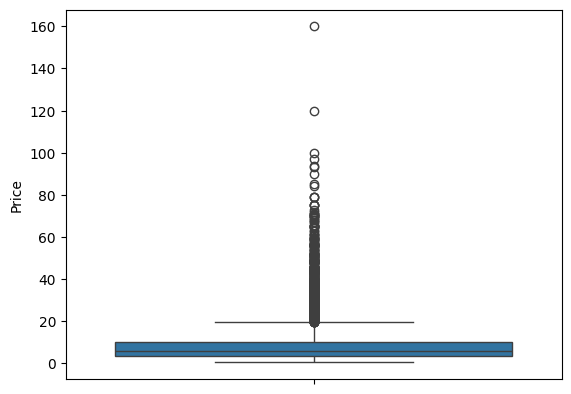

In [23]:
sea.boxplot(df.Price)

In [24]:
df.select_dtypes(exclude=nump.number).nunique()

Location        11
Fuel_Type        5
Transmission     2
Owner_Type       4
dtype: int64

In [25]:
for i in df.select_dtypes(exclude=nump.number).columns[1:-1]:
    print(i,"- % of df")
    print(df[i].value_counts(normalize=True))
    print()

Fuel_Type - % of df
Fuel_Type
Diesel      0.532480
Petrol      0.456222
CNG         0.009304
LPG         0.001661
Electric    0.000332
Name: proportion, dtype: float64

Transmission - % of df
Transmission
Manual       0.714238
Automatic    0.285762
Name: proportion, dtype: float64



In [26]:
df.groupby("Seats")["Price"].mean().sort_values(ascending=False)#GROUPBY is used and COlumn is sorted in descending order 

Seats
2.0     55.211875
4.0     20.752525
7.0     14.837463
6.0      9.511290
5.0      8.461438
8.0      7.458881
9.0      4.450000
10.0     4.280000
Name: Price, dtype: float64

In [27]:
df.groupby("Seats")["Price"].median()

Seats
2.0     54.500
4.0      6.300
5.0      5.200
6.0      6.500
7.0     10.750
8.0      6.295
9.0      4.500
10.0     3.650
Name: Price, dtype: float64

In [28]:
data1 = df.copy()
df.drop("Kilometers_Driven",axis=1,inplace=True)
data1 = df.copy()
df.head()

,Location,Year,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Mumbai,2010,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Pune,2015,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Chennai,2011,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Chennai,2012,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Coimbatore,2013,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


In [29]:
from sklearn.preprocessing import LabelEncoder #HERE IMPORTNG lABel ancoder
lbb_e = LabelEncoder()
df['Fuel_Type'] = lbb_e.fit_transform(df['Fuel_Type']) #converting categorical into numerical data
df['Transmission'] = lbb_e.fit_transform(df['Transmission']) 

print(df)


        Location  Year  Fuel_Type  Transmission Owner_Type  Mileage  Engine  \
0         Mumbai  2010          0             1      First    26.60   998.0   
1           Pune  2015          1             1      First    19.67  1582.0   
2        Chennai  2011          4             1      First    18.20  1199.0   
3        Chennai  2012          1             1      First    20.77  1248.0   
4     Coimbatore  2013          1             0     Second    15.20  1968.0   
...          ...   ...        ...           ...        ...      ...     ...   
6014       Delhi  2014          1             1      First    28.40  1248.0   
6015      Jaipur  2015          1             1      First    24.40  1120.0   
6016      Jaipur  2012          1             1     Second    14.00  2498.0   
6017     Kolkata  2013          4             1      First    18.90   998.0   
6018   Hyderabad  2011          1             1      First    25.44   936.0   

       Power  Seats  Price  
0      58.16    5.0   

In [30]:
df.Owner_Type.unique()

array(['First', 'Second', 'Fourth & Above', 'Third'], dtype=object)

In [31]:
for i in df.index:
    if df.loc[i,"Owner_Type"] == "First": #providing index to FIRST
        df.loc[i,"Owner_Type"] = 1         #Provided Index is 1
    if df.loc[i,"Owner_Type"] == "Second": #providing index to SECOND
        df.loc[i,"Owner_Type"] = 2         #Provided Index is 2
    if df.loc[i,"Owner_Type"] == "Third": #providing index to THIRD
        df.loc[i,"Owner_Type"] = 3         #Provided Index is 3
    if df.loc[i,"Owner_Type"] == "Fourth & Above": #providing index to FOURTH AND ABOVE
        df.loc[i,"Owner_Type"] = 4          #Provided Index is 4

In [32]:
df.Owner_Type = df.Owner_Type.astype("int64")

In [33]:
df.Location = df.Location.map(df.groupby("Location")["Price"].median())

In [34]:
df.head()

,Location,Year,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,5.750,2010,0,1,1,26.60,998.0,58.16,5.0,1.75
1,4.250,2015,1,1,1,19.67,1582.0,126.20,5.0,12.50
2,4.500,2011,4,1,1,18.20,1199.0,88.70,5.0,4.50
3,4.500,2012,1,1,1,20.77,1248.0,88.76,7.0,6.00
4,8.305,2013,1,0,2,15.20,1968.0,140.80,5.0,17.74


In [35]:
X = df.drop("Price",axis=1)  # creating a INdependent variable containing all the attributes except price
Y = df.Price         # creating dependent variable containing only the price column

# Training & Testing (0.25)

In [36]:
X_t,X_tst,y_t,y_tst = train_test_split(X,Y,test_size=0.25,random_state=18) # dividing the data into 75%  train part and rest test part

In [37]:
knn = KNeighborsRegressor().fit(X_t,y_t) # fit is used to train
knn_tst_pre = knn.predict(X_tst)   #for The prediction of test data
r2 = r2_score(y_tst,knn_tst_pre)    #calculating R2SCORe

avge=mean_squared_error(y_tst,knn_tst_pre)  #calcUlate avverage of the squares of error
ravgae = nump.sqrt(mean_squared_error(y_tst,knn_tst_pre)) #calcUlate square root of average of squares of error
avgae = mean_absolute_error(y_tst,knn_tst_pre)  #calcUlate average of absolute error



In [38]:
print("TEST R2 SCORE :",r2);
print("TEST avgae SCORE :",avge);
print("TEST Ravgae SCORE :",ravgae);
print(" TEST avgae SCORE :",avgae);

TEST R2 SCORE : 0.8334731886360316
TEST avgae SCORE : 20.198593533554817
TEST Ravgae SCORE : 4.494284540786755
 TEST avgae SCORE : 1.9590073089700994


# Training & Testing (0.20)

In [39]:
X_t,X_tst,y_t,y_tst = train_test_split(X,Y,test_size=0.20,random_state=16) # dividing the data into 80%  train part and rest test part

In [40]:
knn = KNeighborsRegressor().fit(X_t,y_t)  #training
knn_t_pre = knn.predict(X_t)   # making predictions on train data
knn_tst_pre = knn.predict(X_tst)     # making predictions on test data
r2 = r2_score(y_tst,knn_tst_pre)
r2_train = r2_score(y_t,knn_t_pre)    #calculating R2SCORe
avge=mean_squared_error(y_tst,knn_tst_pre)    #calcUlate avverage of the squares of error
ravgae = nump.sqrt(mean_squared_error(y_tst,knn_tst_pre)) #calcUlate square root of avverage of the squares of error
avgae = mean_absolute_error(y_tst,knn_tst_pre)   #calcUlate avverage of the squares of absolute error


In [41]:
print("TEST R2 SCORE :",r2)
print("TEST avgae SCORE :",avge)
print("TEST Ravgae SCORE :",ravgae)
print("TEST avgae SCORE :",avgae)

TEST R2 SCORE : 0.8406138998369084
TEST avgae SCORE : 22.084568116279073
TEST Ravgae SCORE : 4.6994221045016875
TEST avgae SCORE : 2.0065930232558142


# Training & Testing (0.15)

In [42]:
X_t,X_tst,y_t,y_tst = train_test_split(X,Y,test_size=0.15,random_state=18) # dividing the data into 85%  train part and rest test part

In [43]:
knn = KNeighborsRegressor().fit(X_t,y_t)  #training
knn_t_pre = knn.predict(X_t)    # making prediction of train data
knn_tst_pre = knn.predict(X_tst)      #making prediction of test data
r2 = r2_score(y_tst,knn_tst_pre)        #calculating R2SCORe
r2_train = r2_score(y_t,knn_t_pre)
avge=mean_squared_error(y_tst,knn_tst_pre)   #calcUlate avverage of the squares of error
ravgae = nump.sqrt(mean_squared_error(y_tst,knn_tst_pre))   #calcUlate square root of avverage of the squares of error
avgae = mean_absolute_error(y_tst,knn_tst_pre)      #calcUlate avverage of the squares of absolute error

In [44]:
#TEST DATA
print("TEST R2 SCORE USING KNN",r2)
print("TEST avgae SCORE USING KNN:",avge)
print("TEST Ravgae SCORE USING KNN:",ravgae)
print("TEST avgae SCORE USING KNN:",avgae)

TEST R2 SCORE USING KNN 0.8552603575218423
TEST avgae SCORE USING KNN: 18.04402503211517
TEST Ravgae SCORE USING KNN: 4.247825918292223
TEST avgae SCORE USING KNN: 1.9093045404208193


# TRAINING

In [45]:
X_t,X_tst,y_t,y_tst = train_test_split(X,Y,test_size=0.25,random_state=18) # dividing the data into 75%  train part and rest test part

In [46]:
knn_t_pre = knn.predict(X_t)    #for The prediction of train the data
r2_train = r2_score(y_t,knn_t_pre)    #calculating R2SCORe
avge=mean_squared_error(y_t,knn_t_pre)   #calcUlate avverage of the squares of error
ravgae = nump.sqrt(mean_squared_error(y_t,knn_t_pre)) #calcUlate square root of avverage of the squares of error
avgae = mean_absolute_error(y_t,knn_t_pre)   #calcUlate avverage of the squares of absolute error

In [47]:
print("TRAIN R2 SCORE USING KNN:",r2_train);
print("TRAIN avgae SCORE USING KNN:",avge);
print("TRAIN Ravgae SCORE USING KNN:",ravgae);
print("TRAIN avgae SCORE USING KNN:",avgae);

TRAIN R2 SCORE USING KNN: 0.9020450830362835
TRAIN avgae SCORE USING KNN: 12.380623135135135
TRAIN Ravgae SCORE USING KNN: 3.5186109667218304
TRAIN avgae SCORE USING KNN: 1.4049065130704477


In [48]:
X_t,X_tst,y_t,y_tst = train_test_split(X,Y,test_size=0.20,random_state=16) # dividing the data into 80%  train part and rest test part

In [49]:
knn_t_pre = knn.predict(X_t)
r2_train = r2_score(y_t,knn_t_pre)    #calculating R2SCORe
avge=mean_squared_error(y_t,knn_t_pre)   #calcUlate avverage of the squares of error
ravgae = nump.sqrt(mean_squared_error(y_t,knn_t_pre))  #calcUlate square root of avverage of the squares of error
avgae = mean_absolute_error(y_t,knn_t_pre)  #calcUlate avverage of the squares of absolute error

In [50]:
print("TRAIN R2 SCORE USING KNN:",r2_train);
print("TRAIN avgae SCORE USING KNN:",avge);
print("TRAIN Ravgae SCORE USING KNN:",ravgae);
print("TRAIN avgae SCORE USING KNN:",avgae);

TRAIN R2 SCORE USING KNN: 0.8909241271947834
TRAIN avgae SCORE USING KNN: 13.284117084112149
TRAIN Ravgae SCORE USING KNN: 3.6447382737464356
TRAIN avgae SCORE USING KNN: 1.4639102803738318


In [51]:
X_t,X_tst,y_t,y_tst = train_test_split(X,Y,test_size=0.15,random_state=18)# dividing the data into 85%  train part and rest test part

In [52]:
knn_t_pre = knn.predict(X_t)
r2_train = r2_score(y_t,knn_t_pre)    #calculating R2SCORe
avge=mean_squared_error(y_t,knn_t_pre)  #calcUlate avverage of the squares of error
ravgae = nump.sqrt(mean_squared_error(y_t,knn_t_pre)) #calcUlate square root of avverage of the squares of error
avgae = mean_absolute_error(y_t,knn_t_pre)    #calcUlate avverage of the squares of absolute error

In [53]:
print("TRAIN R2 SCORE USING KNN:",r2_train);
print("TRAIN avgae SCORE USING KNN:",avge);
print("TRAIN Ravgae SCORE USING KNN:",ravgae);
print("TRAIN avgae SCORE USING KNN:",avgae);

TRAIN R2 SCORE USING KNN: 0.8966261712991226
TRAIN avgae SCORE USING KNN: 12.9400212056294
TRAIN Ravgae SCORE USING KNN: 3.5972240972212726
TRAIN avgae SCORE USING KNN: 1.4160054730258014


# For Cross Validation=10 and k=3

In [54]:
# At Fold=10 and testing data =85% we obtain max average accuracy at different k Value
X_t,X_tst,y_t,y_tst = train_test_split(X,Y,test_size=0.15,random_state=18) # dividing the data into 85%  train part and rest test part
classifier =  KNeighborsRegressor(n_neighbors=3)

scr_10 = cross_val_score(classifier, X, Y, cv=10)

print(" Accuracy scr of cross-validation=10 and k=3:", scr_10)

 Accuracy scr of cross-validation=10 and k=3: [0.85596841 0.76893946 0.8448288  0.82195534 0.91614376 0.78125569
 0.79488476 0.8610244  0.8512696  0.81446828]


In [55]:
print("AVERAGE SCORE OF CROSS-VALIDATION=10 AND K=3:",scr_10.mean())

AVERAGE SCORE OF CROSS-VALIDATION=10 AND K=3: 0.8310738485109382


# For Cross Validation=10 and k=4

In [56]:
classifier =  KNeighborsRegressor(n_neighbors=4)

scr_10 = cross_val_score(classifier, X, Y, cv=10)

print(" Accuracy scr of cross-validation=10 and k=4:", scr_10)


 Accuracy scr of cross-validation=10 and k=4: [0.85574747 0.78365493 0.86209139 0.83967908 0.91674976 0.76996416
 0.77557822 0.8601543  0.84333821 0.81046981]


In [57]:
print("AVERAGE SCORE OF CROSS-VALIDATION=10 AND K=4:",scr_10.mean())

AVERAGE SCORE OF CROSS-VALIDATION=10 AND K=4: 0.8317427333059009


#  For Cross Validation=10 and k=5

In [58]:
classifier =  KNeighborsRegressor(n_neighbors=5)

scr_10 = cross_val_score(classifier, X, Y, cv=10)

print(" Accuracy scr of cross-validation=10 and k=5:", scr_10)


 Accuracy scr of cross-validation=10 and k=5: [0.85792239 0.7743356  0.85289911 0.8248018  0.91204373 0.76521722
 0.77294838 0.84870949 0.82213078 0.80921901]


In [59]:

print("AVERAGE SCORE OF CROSS-VALIDATION=10 AND K=5:",scr_10.mean())

AVERAGE SCORE OF CROSS-VALIDATION=10 AND K=5: 0.8240227510567971


# For Cross Validation=5 and k=3

In [60]:
X_t,X_tst,y_t,y_tst = train_test_split(X,Y,test_size=0.15,random_state=18)
classifier =  KNeighborsRegressor(n_neighbors=3)

scr_5 = cross_val_score(classifier, X, Y, cv=5)

print(" Accuracy scr of cross-validation=5 and k=3:", scr_5)

 Accuracy scr of cross-validation=5 and k=3: [0.79613224 0.82261953 0.84648584 0.8255664  0.82254703]


In [61]:
print("AVERAGE SCORE OF CROSS-VALIDATION=5 AND K=3:",scr_5.mean())

AVERAGE SCORE OF CROSS-VALIDATION=5 AND K=3: 0.8226702097899729


#  For Cross Validation=5 and k=4

In [62]:
classifier =  KNeighborsRegressor(n_neighbors=4)

scr_5 = cross_val_score(classifier, X, Y, cv=5)

print(" Accuracy scr of cross-validation=5 and k=4:", scr_5)

 Accuracy scr of cross-validation=5 and k=4: [0.80303358 0.83773746 0.83709607 0.81209452 0.81462139]


In [63]:
print("AVERAGE SCORE OF CROSS-VALIDATION=5 AND K=4:",scr_5.mean())

AVERAGE SCORE OF CROSS-VALIDATION=5 AND K=4: 0.8209166068454273


# For Cross Validation=5 and k=5

In [64]:
classifier =  KNeighborsRegressor(n_neighbors=5)

scr_5 = cross_val_score(classifier, X, Y, cv=5)

print(" Accuracy scr of cross-validation=5 and k=5:", scr_5)


 Accuracy scr of cross-validation=5 and k=5: [0.80199785 0.81765146 0.82948365 0.81422963 0.80744354]


In [65]:
print("AVERAGE SCORE OF CROSS-VALIDATION=5 AND K=5:",scr_5.mean())

AVERAGE SCORE OF CROSS-VALIDATION=5 AND K=5: 0.8141612268645118
